# Import packages

In [1]:
import os
import sys
%matplotlib inline
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import datetime

#to set unique date for outputs
calc_date = datetime.datetime.now()
date=calc_date.strftime('%Y-%m-%d')
#date=calc_date.strftime('%d-%m-%Y')
date = date.replace('-', '')

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=300, dpi_save=300)

In [2]:
#data_path = '/lustre/scratch117/cellgen/team298/SharedFolders/ar32/YS/main_data_with_WE_added/A2_V7_scvi_V8_model_selected_raw_qc_scr_umap_with_broad_labels.h5ad'
#
#metadata_input = '' # leave blank if don't want to use
#
#adata = sc.read(data_path)
#
#if len(metadata_input) == 0:
#    pass
#else:
#    metadata = pd.read_csv(metadata_input, index_col=0)
#    adata = adata[adata.obs.index.isin(list(metadata.index))]
#    adata.obs = metadata

indexer = pd.read_csv('/lustre/scratch117/cellgen/team298/SharedFolders/YS_proj/Datasets/YS_datasets_indexer.csv', index_col=0)

keys = ['YS_EL']

intersect_genes = False

adatas = {}
gene_intersect = []

for key in keys:
    adatas[key] = sc.read(indexer.loc[key]['Specific Directory'])
    adatas[key].var_names_make_unique()
    adatas[key].obs['celltypes_anno'] = adatas[key].obs[indexer.loc[key]['Main_anno_col']]
    
    if len(keys) == 1:
        adata = list(adatas.values())[0].concatenate(list(adatas.values())[1:],join='inner')
        print('Only one dataset selected from indexer, dataset loaded as: adata')
        break
    
    if key == keys[0]:
        gene_intersect = list(adatas[key].var_names)
    else:
        gene_intersect = [gene for gene in list(adatas[key].var_names) if gene in gene_intersect]   #set(list1).intersection(list2)
        if key == keys[-1]:  
            print('All datasets loaded under dictionary: adatas')
            
if intersect_genes == True:
    for dataset in adatas:
        adatas[dataset] = adatas[dataset][:,adatas[dataset].var_names.isin(gene_intersect)]

/home/jovyan/my-conda-envs/YS_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


Only one dataset selected from indexer, dataset loaded as: adata


In [3]:
adata.obs['organ_celltype_identifier'].value_counts()

YS      169494
fliv     49376
Name: organ_celltype_identifier, dtype: int64

In [4]:
adata = adata[adata.obs['organ_celltype_identifier'].isin(['fliv'])]

In [5]:
# normalise count data
sc.pp.normalize_total(adata, target_sum=1e4)
# log the count data
sc.pp.log1p(adata) # note data isn't actually normalised
# scale the data
#sc.pp.scale(adata, max_value=10)

/home/jovyan/my-conda-envs/YS_env/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


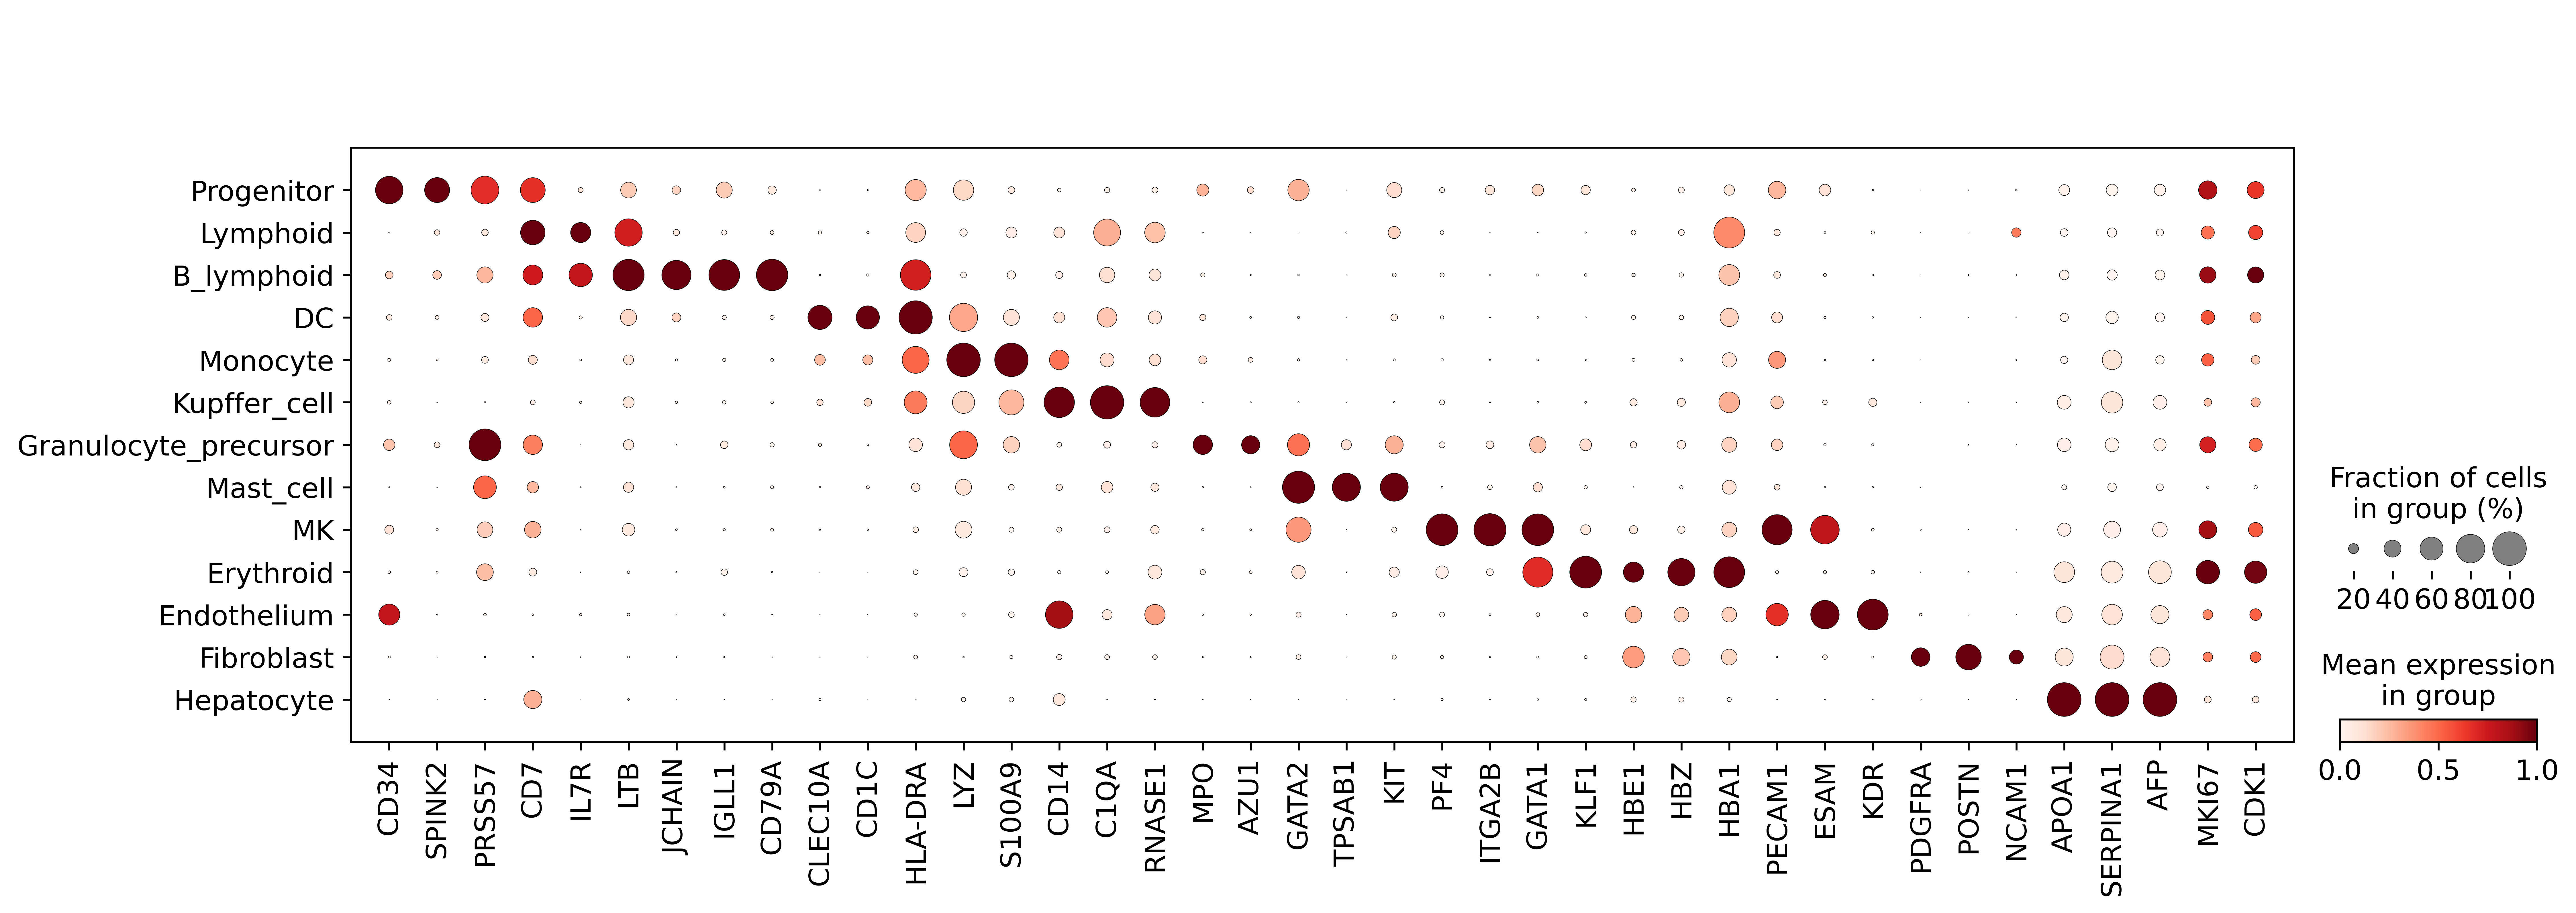

In [10]:
adata.obs["celltypes_for_dotplot"] = adata.obs["broad_cell.labels"].astype('category')
adata.obs["celltypes_for_dotplot"] = adata.obs["celltypes_for_dotplot"].cat.reorder_categories([
'Progenitor',
'Lymphoid',
'B_lymphoid',
'DC',
'Monocyte',
'Kupffer_cell',
'Granulocyte_precursor',
'Mast_cell',
'MK',
'Erythroid',
'Endothelium',
'Fibroblast',
'Hepatocyte',
])

gene_list2 = [
'CD34',
'SPINK2',
'PRSS57',
'CD7',
'IL7R',
'LTB',
'JCHAIN',
'IGLL1',
'CD79A',
'CLEC10A',
'CD1C',
'HLA-DRA',
'LYZ',
'S100A9',
'CD14',
'C1QA',
'RNASE1',
'MPO',
'AZU1',
'GATA2',
'TPSAB1',
'KIT',
'PF4',
'ITGA2B',
'GATA1',
'KLF1',
'HBE1',
'HBZ',
'HBA1',
'PECAM1',
'ESAM',
'KDR',
'PDGFRA',
'POSTN',
'NCAM1',
'APOA1',
'SERPINA1',
'AFP',
'MKI67',
'CDK1',
]

sc.pl.dotplot(adata, var_names=gene_list2, groupby='celltypes_for_dotplot', use_raw=False, standard_scale='var', save='YS_ext_fig3E_{d}.pdf'.format(d=date)) 

# Protein

In [ ]:
import os
import sys
%matplotlib inline
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import datetime
import rpy2
import seaborn as sns

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=300, dpi_save=300)

In [ ]:
# Read in DSB GMM processed liver protein
protein = sc.read('/nfs/team298/ar32/YS_citeseq_submission_1_anndata_objects/cite_seq_protein_simple_processed_for_submission_20220407.h5ad')

In [ ]:
protein_markers = [
'CD34',
'CD7',
'CD127',
'LT_bR',
'CD79a',
'CD301',
'CD1c',
'HLA_DR',
'CD16',
'CD4',
'CD14',
'CD117',
'CD41',
'CD61',
'CLEC1B',
'CD235a',
'CD31',
'CD201',
'CD309',
'CD90',
'CD326'
]


sc.pl.dotplot(protein, var_names=protein_markers, groupby='broad_anno', standard_scale='var', cmap='Blues')